# Assignment 2

### Importing Required Libraries in Notebook

In [1]:
import pandas as pd
import numpy as np
import math
from operator import itemgetter
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.metrics import r2_score

# Part 1-1 (Robot Dataset)

### Reading Datasets

In [2]:
robot_1_data = pd.read_csv('./Datasets/RobotDataset/Robot1', header = None, delimiter = ' ').dropna(axis = 1)
robot_2_data = pd.read_csv('./Datasets/RobotDataset/Robot2', header = None, delimiter = ' ').dropna(axis = 1)

robot_1_train = robot_1_data.sample(frac = 0.8, random_state = 200)
robot_1_validation = robot_1_data.drop(robot_1_train.index)

robot_2_train = robot_2_data.sample(frac = 0.8, random_state = 200)
robot_2_validation = robot_2_data.drop(robot_2_train.index)

robot_1_train

,1,2,3,4,5,6,7,8
39,0,1,3,2,2,4,1,data_135
34,0,1,3,1,3,4,2,data_120
69,1,2,2,1,3,4,2,data_216
88,1,3,1,1,1,1,2,data_290
78,0,2,3,1,2,3,1,data_253
90,0,3,1,1,2,2,2,data_300
41,1,1,3,2,3,1,1,data_137
117,1,3,3,2,1,3,2,data_414
36,1,1,3,2,2,1,2,data_130
98,0,3,2,1,1,4,2,data_344


In [3]:
def eucledian(train, test):
    distance = 0.0
    for i in range(1, 7):
        distance += pow((train[i] - test[i]), 2)
    return math.sqrt(distance)

In [4]:
def find_neighbours(train_data, test_data):
    distances_list = []
    for index, row in train_data.iterrows():
        query = row.tolist()
        label = row[1]
        distance = eucledian(query, test_data)
        distances_list.append([distance, label])
    return distances_list

In [5]:
def majority_class(distances, k):
    stripped_list = sorted(distances, key = itemgetter(0))[:k]
    label_0 = 0
    label_1 = 0
    for lst in stripped_list:
        if lst[1] == 1:
            label_1 += 1
        else:
            label_0 += 1
    return 0 if label_0 > label_1 else 1

In [6]:
def calc_metrics(predicted, actual):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i] and predicted[i] == 1:
            tp += 1
        elif predicted[i] == actual[i] and predicted[i] == 0:
            tn += 1
        elif predicted[i] != actual[i] and predicted[i] == 1:
            fp += 1
        else:
            fn += 1
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    a = 1/precision
    b = 1/recall
    f1_score = 2/(a + b)
    print('Accuracy - ', accuracy)
#     print('Precision - ', precision)
#     print('Recall - ', recall)
#     print('True Positive - ', tp)
#     print('True Negative - ', tn)
#     print('False Positive - ', fp)
#     print('False Negative - ', fn)
    return accuracy

Accuracy -  0.72
Accuracy -  0.64
Accuracy -  0.68
Accuracy -  0.76
Accuracy -  0.68
Accuracy -  0.68
Accuracy -  0.68
Accuracy -  0.64
Accuracy -  0.68
Accuracy -  0.68


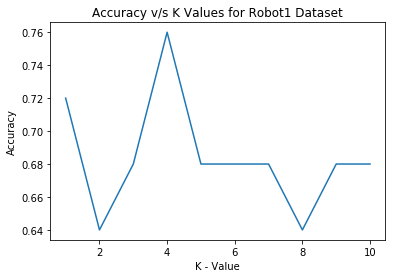

Accuracy -  0.9583333333333334
Accuracy -  0.9583333333333334
Accuracy -  1.0
Accuracy -  0.9166666666666666
Accuracy -  0.9583333333333334
Accuracy -  1.0
Accuracy -  0.9166666666666666
Accuracy -  0.9583333333333334
Accuracy -  0.9166666666666666
Accuracy -  0.9166666666666666


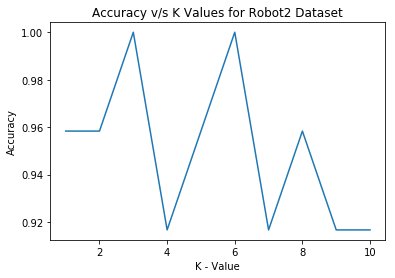

In [7]:
def kNN(train_data, test_data, k):
    prediction = []
    for index, row in test_data.iterrows():
        query = row.tolist()
        distances = find_neighbours(train_data, query)
        predicted_label = majority_class(distances, k)
        prediction.append(predicted_label)
    actual = test_data[1].tolist()
    accuracy = calc_metrics(prediction, actual)
    return accuracy

accuracy_with_different_k = []
for i in range(1, 11):
#     print('K Value - ', i)
    accuracy_with_different_k.append(kNN(robot_1_train, robot_1_validation, i))
#     print('--------------------------------')
k_values = [x for x in range(1, 11)]

plt.plot(k_values, accuracy_with_different_k)
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K Values for Robot1 Dataset')
plt.show()

accuracy_with_different_k = []
for i in range(1, 11):
#     print('K Value - ', i)
    accuracy_with_different_k.append(kNN(robot_2_train, robot_2_validation, i))
#     print('--------------------------------')
k_values = [x for x in range(1, 11)]

plt.plot(k_values, accuracy_with_different_k)
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K Values for Robot2 Dataset')
plt.show()

# Part 1-2 (Iris Dataset)

### Reading Dataset

In [8]:
iris = pd.read_csv('./Datasets/Iris/Iris.csv', header = None)

iris_train = iris.sample(frac = 0.8, random_state = 200)
iris_validation = iris.drop(iris_train.index)

iris_validation

,0,1,2,3,4
1,6.3,3.3,6.0,2.5,Iris-virginica
6,5.4,3.9,1.3,0.4,Iris-setosa
7,5.7,3.8,1.7,0.3,Iris-setosa
11,5.6,2.9,3.6,1.3,Iris-versicolor
14,5.4,3.9,1.7,0.4,Iris-setosa
15,5.2,3.4,1.4,0.2,Iris-setosa
16,5.0,3.5,1.6,0.6,Iris-setosa
23,5.6,2.8,4.9,2.0,Iris-virginica
24,6.1,3.0,4.9,1.8,Iris-virginica
26,6.1,3.0,4.6,1.4,Iris-versicolor


In [9]:
def eucledian_iris(train, test):
    distance = 0.0
    for i in range(0, 4):
        distance += pow((train[i] - test[i]), 2)
    return math.sqrt(distance)

In [10]:
def find_neighbours_iris(train_data, test_data):
    distances_list = []
    for index, row in train_data.iterrows():
        query = row.tolist()
        label = row[4]
        distance = eucledian_iris(query, test_data)
        distances_list.append([distance, label])
    return distances_list

In [11]:
def majority_class_iris(distances, k):
    stripped_list = sorted(distances, key = itemgetter(0))[:k]
    label_setosa = 0
    label_virginica = 0
    label_versicolor = 0
    for lst in stripped_list:
        if lst[1] == 'Iris-setosa':
            label_setosa += 1
        elif lst[1] == 'Iris-virginica':
            label_virginica += 1
        else:
            label_versicolor += 1
    if label_setosa > label_virginica and label_setosa > label_versicolor:
        return 'Iris-setosa'
    elif label_virginica > label_setosa and label_virginica > label_versicolor:
        return 'Iris-virginica'
    elif label_versicolor > label_setosa and label_versicolor > label_virginica:
        return 'Iris-versicolor'


In [12]:
def calc_preformance_iris(target_value,pridected_value):
    accuracy_list=[]
    precision_list=[]
    recall_list=[]
    f1_score_list=[]
    li =['Iris-setosa','Iris-virginica','Iris-versicolor' ]
    for key in li:
        t_p=0
        f_p=0
        t_n=0
        f_n=0
        for i in range(len(target_value)): 
            if target_value[i]==key and target_value[i]==pridected_value[i]:
                t_p=t_p+1
            elif  target_value[i]!=key and target_value[i]==pridected_value[i]:
                t_n=t_n+1
            elif pridected_value[i]==key and  target_value[i]!=key:
                f_p=f_p+1
            elif pridected_value[i]!=key and target_value[i]==key:
                f_n=f_n+1
        if t_p!=0:
            accuracy=(t_n+t_p)/float(t_n+t_p+f_p+f_n)

            precision=(t_p)/float(t_p+f_p)
            recall=(t_p)/float(t_p+f_n)
            a=1/precision
            b=1/recall
            f1_score=2/(a+b)
        else :
            accuracy=0
            precision=0
            recall=0
            f1_score=0
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
    print ("Accuracy ",sum(accuracy_list)/float(len(li)))
    print ("Precision ",sum(precision_list)/float(len(li)))
    print ("Recall ",sum(recall_list)/len(li))
    print ("F1 Score",sum(f1_score_list)/len(li))
    print()
    return sum(accuracy_list)/float(len(li))

In [13]:
def calc_metrics_iris(predicted, actual):
    tp = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            tp += 1
    accuracy = tp/len(predicted)
    print('Accuracy - ', accuracy)
    return accuracy

Accuracy  0.9753086419753085
Precision  0.9583333333333334
Recall  0.9696969696969697
F1 Score 0.9619047619047619

Accuracy  0.9610256410256411
Precision  0.8916666666666666
Recall  1.0
F1 Score 0.9407407407407407

Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0

Accuracy  0.9476495726495727
Precision  0.8416666666666667
Recall  1.0
F1 Score 0.9055330634278002

Accuracy  0.9506172839506174
Precision  0.9166666666666666
Recall  0.9444444444444445
F1 Score 0.9220779220779222

Accuracy  0.9348717948717948
Precision  0.8416666666666667
Recall  0.9666666666666667
F1 Score 0.8897435897435897

Accuracy  0.9506172839506174
Precision  0.9249999999999999
Recall  0.9249999999999999
F1 Score 0.9249999999999999

Accuracy  0.9610256410256411
Precision  0.8833333333333333
Recall  1.0
F1 Score 0.9348370927318296

Accuracy  0.9753086419753085
Precision  0.9583333333333334
Recall  0.9696969696969697
F1 Score 0.9619047619047619

Accuracy  0.9624881291547959
Precision  0.9249999999999999
Recall  0.9

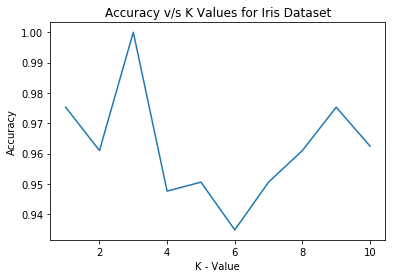

In [14]:
def kNN(train_data, test_data, k):
    prediction = []
    for index, row in test_data.iterrows():
        query = row.tolist()
        distances = find_neighbours_iris(train_data, query)
        predicted_label = majority_class_iris(distances, k)
        prediction.append(predicted_label)
    actual = test_data[4].tolist()
#     accuracy = calc_metrics_iris(prediction, actual)
    accuracy = calc_preformance_iris(prediction, actual)
    return accuracy

accuracy_with_different_k = []
for i in range(1, 11):
    accuracy_with_different_k.append(kNN(iris_train, iris_validation, i))
k_values = [x for x in range(1, 11)]

plt.plot(k_values, accuracy_with_different_k)
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K Values for Iris Dataset')
plt.show()

# Part 2

### Reading Dataset

In [15]:
data = pd.read_csv('./Datasets/LoanDataset/data.csv', header = None)
data = data.iloc[1:, 1:] # ignoring 1st row and 1st column

train_data = data.sample(frac = 0.8, random_state = 200)
validation_data = data.drop(train_data.index)

categorical_attributes = [5, 7, 9, 10, 11, 12]
numerical_atributes = [1, 2, 3, 6, 8]

In [16]:
def summarize_categorical_data(data, attribute_list, summary):
    target_variables = data[13].unique()
    for attribute in attribute_list:
        summary[attribute] = {}
        for value in data[attribute].unique():
            summary[attribute][value] = {}
            for variable in target_variables:
                num = len(data[attribute][data[attribute] == value][data[13] == variable])
                den = len(data[13][data[13] == variable])
                prob = num/den
                summary[attribute][value][variable] = prob
#     print(summary)
summarize_categorical_data(train_data, categorical_attributes, {})

In [17]:
def sumamrize_numerical_data(data, attribute_list, summary):
    target_variables = data[13].unique()
    for attribute in attribute_list:
        summary[attribute] = {}
        summary[attribute]['mean'] = {}
        summary[attribute]['deviation'] = {}
        for varaible in target_variables:
            mean = data[attribute][data[13] == varaible].mean()
            deviation = data[attribute][data[13] == varaible].std()
            summary[attribute]['mean'][varaible] = mean
            summary[attribute]['deviation'][varaible] = deviation
#     print(summary)
sumamrize_numerical_data(train_data, numerical_atributes, {})

In [18]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [19]:
def calc_metrics_loan(predicted, actual):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i] and predicted[i] == 1:
            tp += 1
        elif predicted[i] == actual[i] and predicted[i] == 0:
            tn += 1
        elif predicted[i] != actual[i] and predicted[i] == 1:
            fp += 1
        else:
            fn += 1
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    a = 1/precision
    b = 1/recall
    f1_score = 2/(a + b)
    print('Accuracy - ', accuracy)
    print('Precision - ', precision)
    print('Recall - ', recall)
    print('True Positive - ', tp)
    print('True Negative - ', tn)
    print('False Positive - ', fp)
    print('False Negative - ', fn)
    return accuracy

In [20]:
def naive_bayes(train_data, test_data):
    summary_categorical = {}
    summary_numerical = {}
    summarize_categorical_data(train_data, categorical_attributes, summary_categorical)
    sumamrize_numerical_data(train_data, numerical_atributes, summary_numerical)
    
    pprint(summary_categorical)
    pprint(summary_numerical)
    total_yes = len(train_data[train_data[13] == 1.0])/len(train_data[13])
    total_no = len(train_data[train_data[13] == 0.0])/len(train_data[13])
    prediction = []
    for index, row in test_data.iterrows():
        prob_yes = total_yes
        prob_no = total_no
        for i in range(1, 13):
            if i == 4:
                continue
            if i in categorical_attributes:
                prob_yes *= summary_categorical[i][row[i]][1.0]
                prob_no *= summary_categorical[i][row[i]][0.0]
            else:
                mean = summary_numerical[i]['mean'][1.0]
                sd = summary_numerical[i]['deviation'][1.0]
                prob_yes *= normpdf(row[i], mean, sd)
                mean = summary_numerical[i]['mean'][0.0]
                sd = summary_numerical[i]['deviation'][0.0]
                prob_no *= normpdf(row[i], mean, sd)
        prediction.append(1.0 if prob_yes > prob_no else 0.0)
    
    actual = test_data[13].tolist()
    calc_metrics_loan(prediction, actual)

naive_bayes(train_data, validation_data)

{5: {1: {0.0: 0.3017241379310345, 1.0: 0.2222222222222222},
     2: {0.0: 0.2672413793103448, 1.0: 0.21082621082621084},
     3: {0.0: 0.19119458128078817, 1.0: 0.28774928774928776},
     4: {0.0: 0.23983990147783252, 1.0: 0.2792022792022792}},
 7: {1.0: {0.0: 0.44642857142857145, 1.0: 0.19373219373219372},
     2.0: {0.0: 0.26785714285714285, 1.0: 0.37606837606837606},
     3.0: {0.0: 0.2857142857142857, 1.0: 0.4301994301994302}},
 9: {0.0: {0.0: 0.8968596059113301, 1.0: 0.8689458689458689},
     1.0: {0.0: 0.10314039408866996, 1.0: 0.13105413105413105}},
 10: {0.0: {0.0: 0.9664408866995073, 1.0: 0.7094017094017094},
      1.0: {0.0: 0.03355911330049261, 1.0: 0.2905982905982906}},
 11: {0.0: {0.0: 0.3999384236453202, 1.0: 0.36182336182336183},
      1.0: {0.0: 0.6000615763546798, 1.0: 0.6381766381766382}},
 12: {0.0: {0.0: 0.7105911330049262, 1.0: 0.7094017094017094},
      1.0: {0.0: 0.2894088669950739, 1.0: 0.2905982905982906}}}
{1: {'deviation': {0.0: 11.429478544479084, 1.0: 11.56

# Part 3

### Reading Dataset

In [54]:
data = pd.read_csv('./Datasets/AdmissionDataset/data.csv')
data  = (data - data.mean())/data.std()
data = data.iloc[:, 1:]
train = data.sample(frac = 0.8, random_state = 200)
validation = data.drop(train.index)
train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
198,-0.136050,-1.023021,-0.111086,0.139815,1.121465,0.921506,-1.111779,0.488770
39,-0.400700,-0.358961,-0.988084,-0.866855,-0.509977,-0.763362,-1.111779,-0.572065
215,-0.753568,0.471114,-0.111086,0.139815,-0.509977,-0.963544,0.897460,-1.845067
303,-0.400700,0.139084,-0.111086,0.139815,-0.509977,-0.079406,-1.111779,-0.218453
377,0.393251,0.305099,0.765912,0.643150,0.577651,0.170822,0.897460,-0.218453
13,0.393251,0.305099,-0.111086,-0.363520,-0.509977,-0.062724,0.897460,0.488770
203,0.746118,0.803143,0.765912,0.643150,0.577651,0.704642,0.897460,0.559492
241,0.040384,-0.026931,-0.988084,0.139815,-0.509977,-0.496452,-1.111779,-0.430620
107,-0.047833,-0.524976,-0.111086,-0.363520,0.033837,-0.963544,0.897460,-0.006286
371,-0.047833,0.637128,0.765912,0.643150,1.665279,-0.062724,-1.111779,-0.077009


In [42]:
def logistic(predicted):
    class_0 = []
    class_1 = []
    for i in range(len(predicted)):
        sigmoid = 1/(1 + math.exp(-predicted[i]))
        if sigmoid <= 0.5:
            class_0.append(predicted[i])
        else:
            class_1.append(predicted[i])
    print(class_0, class_1)

In [92]:
def calc_error(predicted, actual):
#     print(actual, predicted)
    error_mse = 0
    error_mae = 0
    error_mape = 0
    for i in  range(len(predicted)):
        error_mse += (predicted[i] - actual[i]) ** 2
        error_mae += abs(predicted[i] - actual[i])
        error_mape += abs((actual[i] - predicted[i])/actual[i])
    mse = error_mse/len(predicted)
    mae = error_mae/len(predicted)
    mape = error_mape * 100/len(predicted)
    print('MSE - ', mse)
    print('MAE - ', mae)
    print('MAPE - ', mape)

In [93]:
def predict_admission(data, beta):
    x = data.iloc[:, 0:7].values
    ones = np.ones(len(data))
    X = np.concatenate((ones[:, np.newaxis], x), axis = 1)
    Y = np.matmul(beta.T, X.T)
    return Y

In [94]:
# def linear_regression(train_data, test_data):
#     x = train_data.iloc[:, 0:7].values
#     ones = np.ones(len(train_data))
#     X = np.concatenate((ones[:, np.newaxis], x), axis = 1)
#     Y = np.array(train_data.iloc[:, 7:8])
#     beta = np.zeros(8)
#     X_Trans = X.T
#     val = X_Trans @ X
#     inv_val = np.linalg.inv(val)
#     val = inv_val @ X_Trans 
#     beta = val @ Y
    
#     actual = test_data['Chance of Admit'].values
#     predicted = predict_admission(test_data, beta)
#     print(r2_score(actual, predicted[0]))
# #     logistic(predicted[0])
#     calc_error(predicted[0], actual)
    
# linear_regression(train, validation)

In [95]:
def linear_regression_gradient_descent(train_data, test_data, mode):
    x = train_data.iloc[:, 0:7].values
    ones = np.ones(len(train_data))
    X = np.concatenate((ones[:, np.newaxis], x), axis = 1)
    Y = np.array(train_data.iloc[:, 7:8])
    beta = np.zeros(8)
    beta.shape = (8, 1)
    alpha = 0.0125
    if mode == 'mae':
        for _ in range(500):
            hypo = np.matmul(X, beta)
            loss = np.subtract(hypo, Y)
            new_loss = np.divide(loss, np.abs(loss))
            gradient = (alpha/len(train_data)*2) * np.matmul(new_loss.T, X)
            beta = beta - gradient.T
    elif mode == 'mse':
        for _ in range(500):
            hypo = np.matmul(X, beta)
            loss = np.subtract(hypo, Y)
            gradient = (alpha/len(train_data)) * np.matmul(loss.T, X)
            beta = beta - gradient.T
    elif mode == 'mape':
        for _ in range(1000):
            hypo = np.matmul(X, beta)
            loss = np.subtract(hypo, Y)
            new_loss = np.divide(loss, (Y*loss))
            gradient = (alpha/len(train_data)*2) * np.matmul(new_loss.T, X)
            beta = beta - gradient.T
    print(beta)
    actual = test_data['Chance of Admit'].values
    predicted = predict_admission(test_data, beta)
    print(actual, predicted[0])
    print(r2_score(actual, predicted[0]))
#     logistic(predicted[0])
    calc_error(predicted[0], actual)
    
    
linear_regression_gradient_descent(train, validation, 'mae')

[[0.07138889]
 [0.12800382]
 [0.13829086]
 [0.07830779]
 [0.02396279]
 [0.08761314]
 [0.45879122]
 [0.12239246]]
[-0.50134265 -0.07700875  1.3374376   0.41804748  0.41804748  1.69104919
 -0.14773106 -1.56217741 -0.64278728  1.62032687 -1.13784351 -0.21845338
 -0.21845338  0.13515821 -0.57206497  1.19599297  0.55949211  0.98382601
 -1.98651131  1.47888224 -0.35989802 -0.14773106 -1.13784351  1.12527065
 -0.78423192 -0.78423192 -1.27928814 -1.27928814 -0.07700875  1.3374376
 -0.14773106  0.13515821 -0.21845338 -1.70362205 -0.2891757   1.19599297
  0.34732516 -0.78423192  0.48876979 -1.06712119  0.70093675 -0.7135096
  0.48876979  0.34732516 -1.35001046  1.54960455  0.20588052 -1.84506668
  1.3374376   0.84238138  1.3374376   1.47888224  0.06443589  0.55949211
 -0.50134265 -0.57206497  0.13515821 -0.21845338  1.54960455  1.69104919
  0.98382601 -0.2891757  -0.14773106  0.06443589  0.55949211  0.55949211
 -1.27928814 -0.7135096   0.06443589 -0.78423192 -0.00628643 -0.07700875
 -0.50134265 